Insurance Claim Fraud Detection

Project Description:-

Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem. In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made.
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

Dataset Link- https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/Automobile_insurance_fraud.csv

In [1]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\Data-Science-ML-Capstone-Projects-master\Automobile_insurance_fraud.csv")
df.head(10)

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
5,256,39,104594,12-10-2006,OH,250/500,1000,1351.10,0,478456,...,NO,64100,6410,6410,51280,Saab,95,2003,Y,NaN
6,137,34,413978,04-06-2000,IN,250/500,1000,1333.35,0,441716,...,?,78650,21450,7150,50050,Nissan,Pathfinder,2012,N,NaN
7,165,37,429027,03-02-1990,IL,100/300,1000,1137.03,0,603195,...,YES,51590,9380,9380,32830,Audi,A5,2015,N,NaN
8,27,33,485665,05-02-1997,IL,100/300,500,1442.99,0,601734,...,YES,27700,2770,2770,22160,Toyota,Camry,2012,N,NaN
9,212,42,636550,25-07-2011,IL,100/300,500,1315.68,0,600983,...,?,42300,4700,4700,32900,Saab,92x,1996,N,NaN


In [3]:
# Data type of columns 
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [4]:
# For checking dataset diemensions 
df.shape 

(1000, 40)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
# Summarizing the distribution of the numerical variables.
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


Checking for missing value

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [8]:
# '_c39' column contain all NaN value.So we drop column. 
df.drop('_c39', axis=1, inplace=True)

In [9]:
df['fraud_reported'].nunique()

2

Labeled columns have 2 unique category that mean Classification problem.

Value count of Categorical columns

In [10]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [11]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [12]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64

In [13]:
# replace ? with Unknown name in column collision_type
df['collision_type'] = df['collision_type'].str.strip()
df['collision_type'].replace('?', 'Unknown', inplace=True)

In [14]:
df['incident_severity'].value_counts()

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64

In [15]:
df['incident_location'].value_counts()

9935 4th Drive         1
4214 MLK Ridge         1
8548 Cherokee Ridge    1
2352 MLK Drive         1
9734 2nd Ridge         1
                      ..
6770 1st St            1
4119 Texas St          1
4347 2nd Ridge         1
1091 1st Drive         1
1416 Cherokee Ridge    1
Name: incident_location, Length: 1000, dtype: int64

All incident location are different for 1000 accident.

In [16]:
# 'incident_location' column contain all unique value.So we drop column. 
df.drop('incident_location', axis=1, inplace=True)

In [17]:
df['property_damage'].value_counts()

?      360
NO     338
YES    302
Name: property_damage, dtype: int64

In [18]:
# replace ? with Unknown name in column property_damage
df['property_damage'] = df['property_damage'].str.strip()
df['property_damage'].replace('?', 'Unknown', inplace=True)

In [19]:
df['police_report_available'].value_counts()

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64

In [20]:
# replace ? with Unknown name in column police_report_available
df['police_report_available'] = df['police_report_available'].str.strip()
df['police_report_available'].replace('?', 'Unknown', inplace=True)

In [21]:
df['auto_make'].value_counts()

Saab          80
Dodge         80
Suburu        80
Nissan        78
Chevrolet     76
Ford          72
BMW           72
Toyota        70
Audi          69
Accura        68
Volkswagen    68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64

In [22]:
# Convert 'policy_bind_date' and 'incident_date' to datetime format
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])

Data Visualization

1.Using Univariate Plots

numerical_cols 

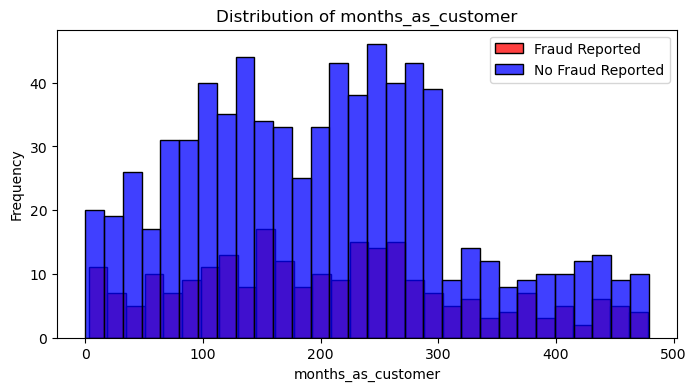

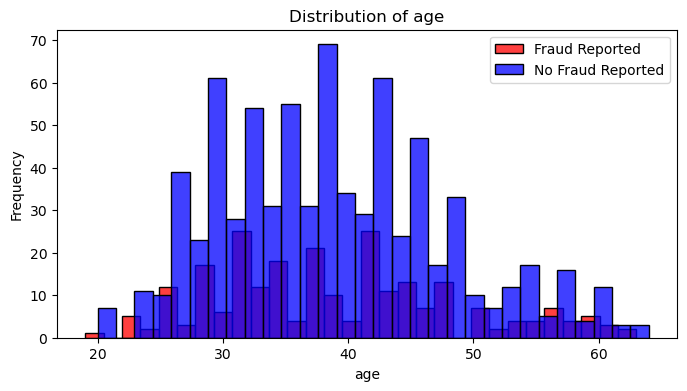

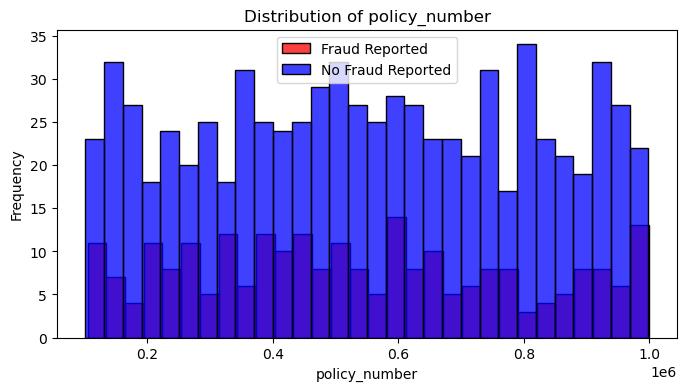

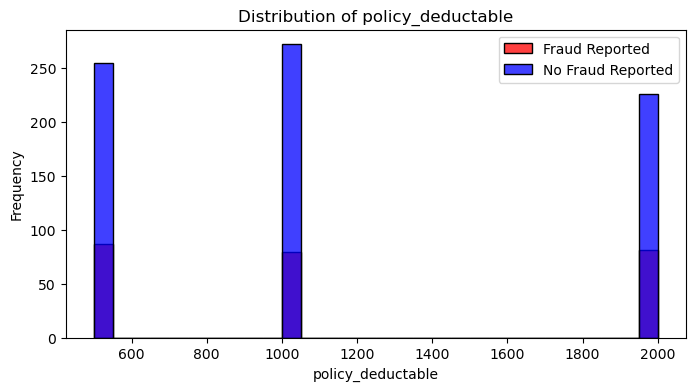

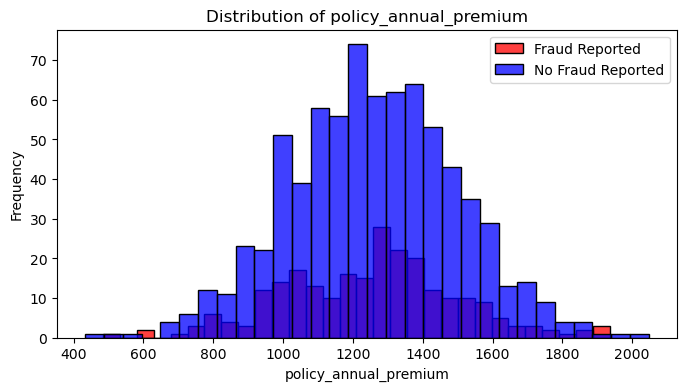

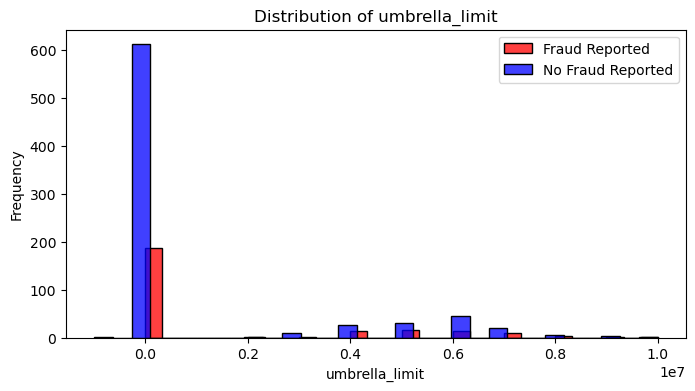

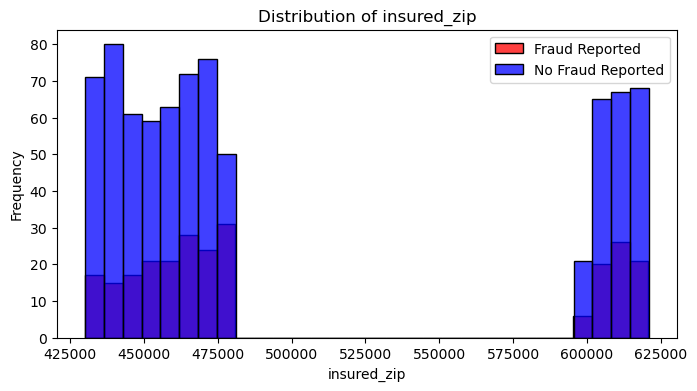

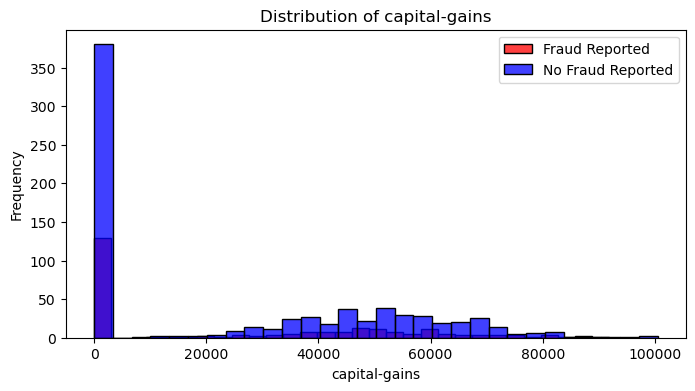

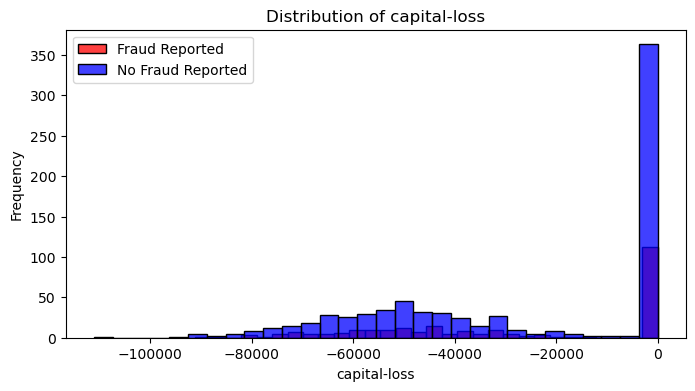

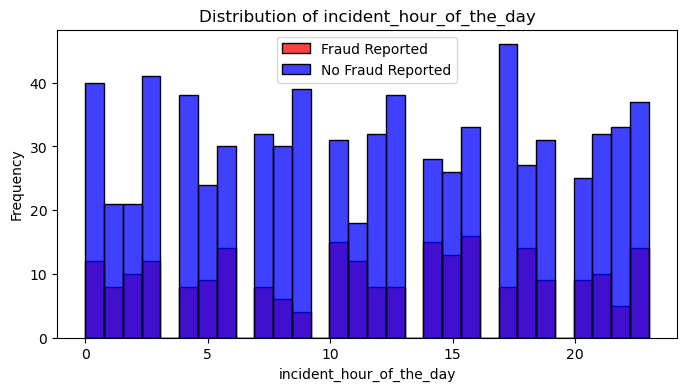

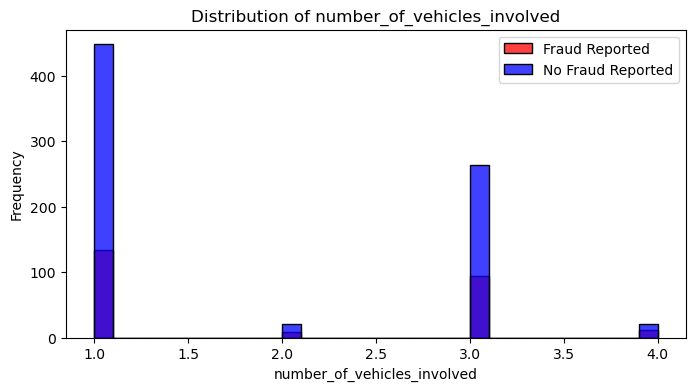

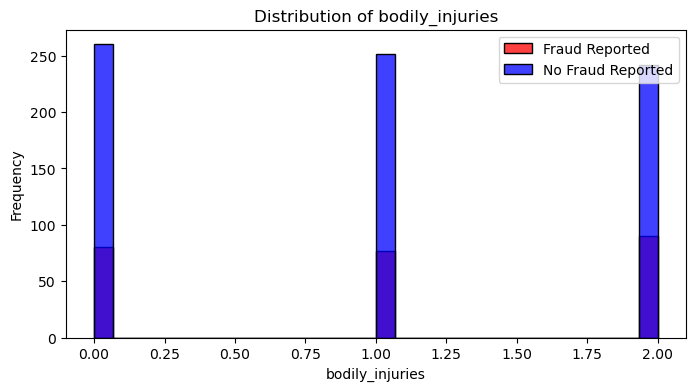

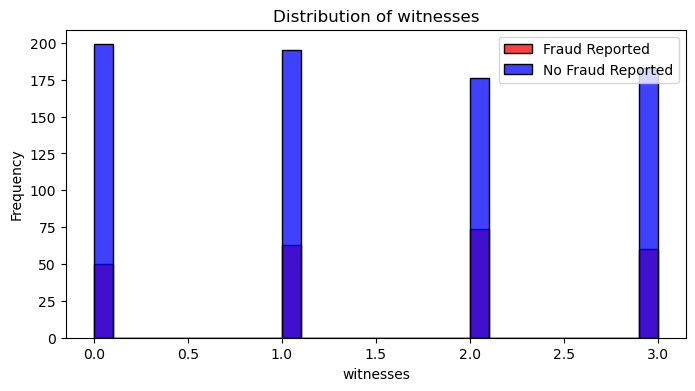

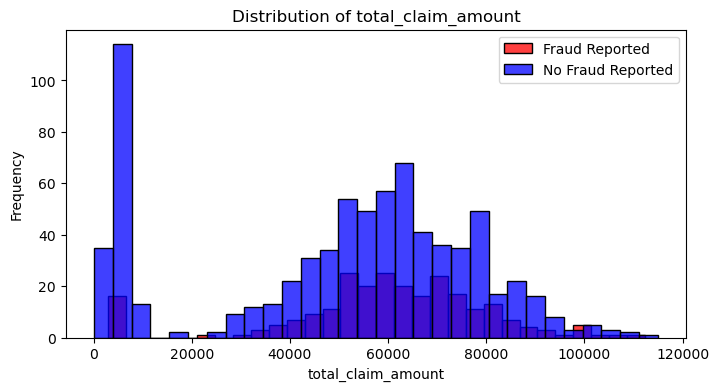

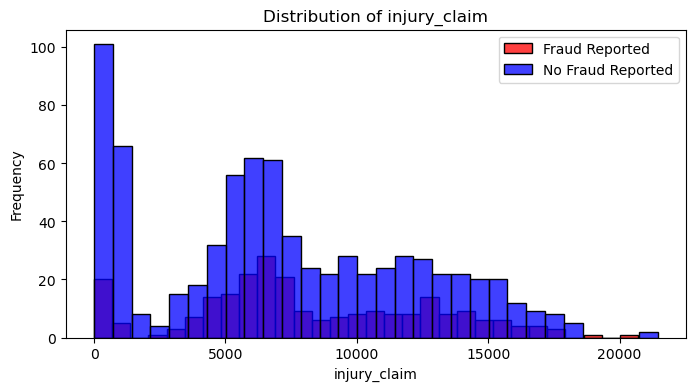

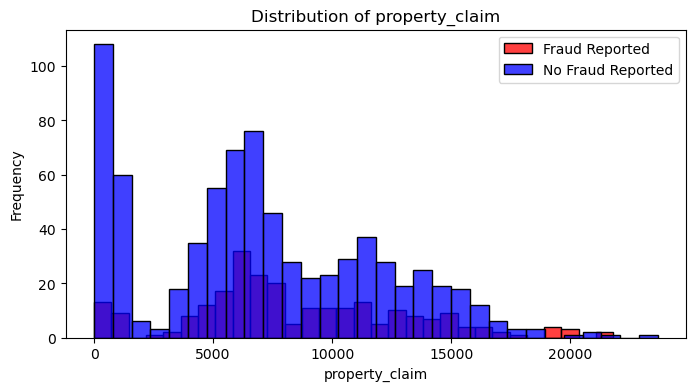

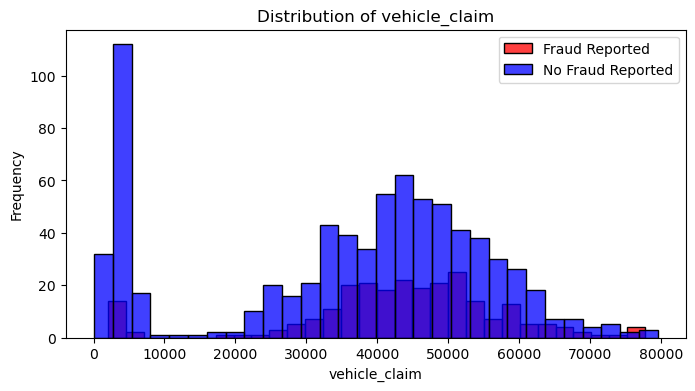

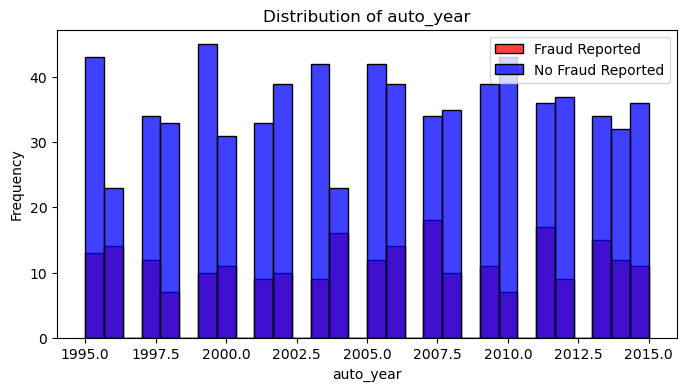

In [23]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distplots for numerical columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df[df['fraud_reported'] == 'Y'][col], kde=False, bins=30, color='red', label='Fraud Reported')
    sns.histplot(data=df[df['fraud_reported'] == 'N'][col], kde=False, bins=30, color='blue', label='No Fraud Reported')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()
    

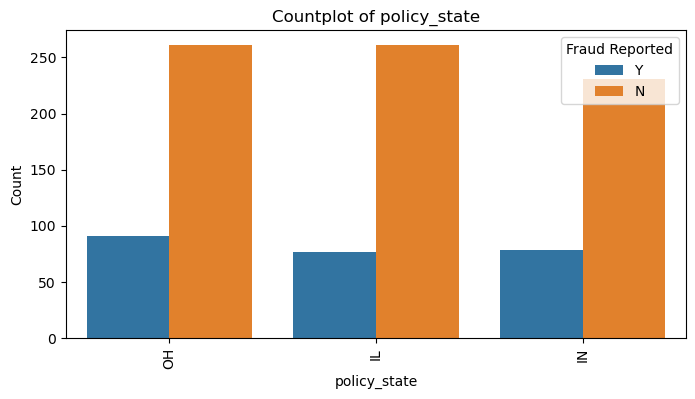

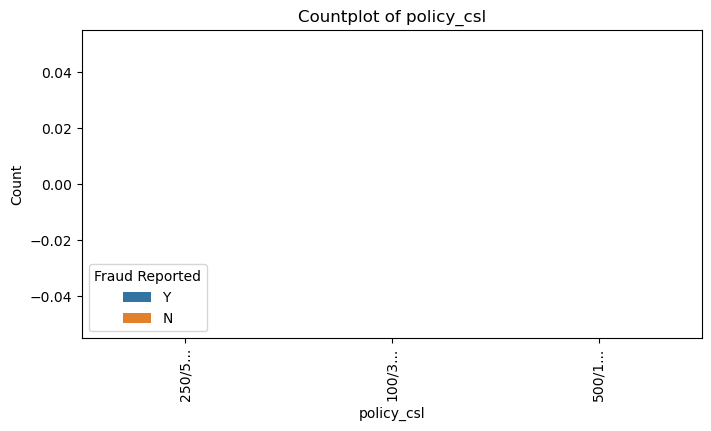

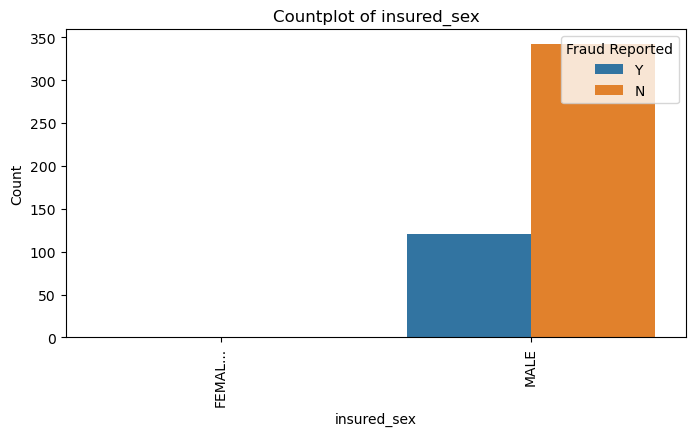

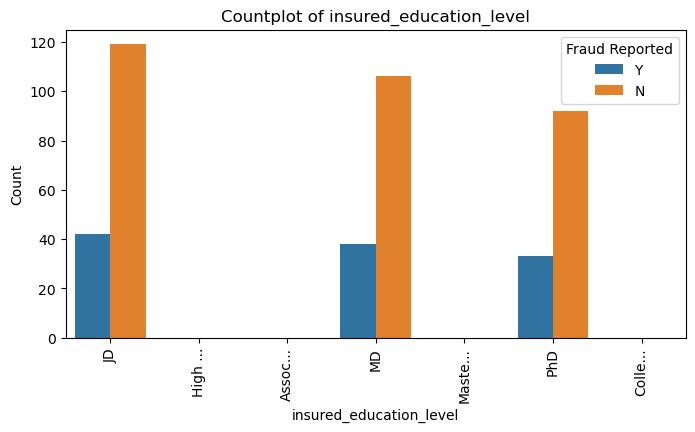

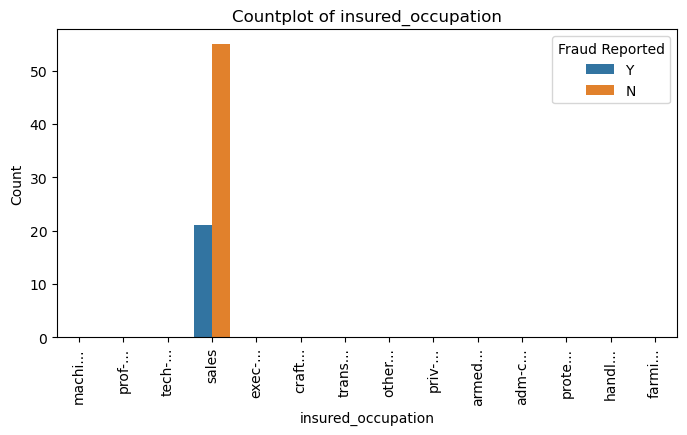

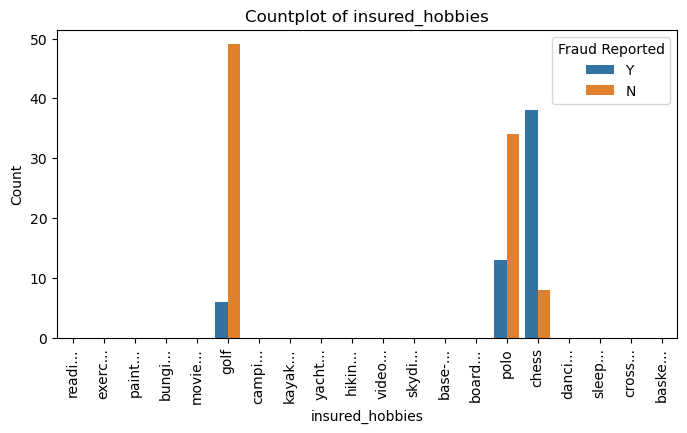

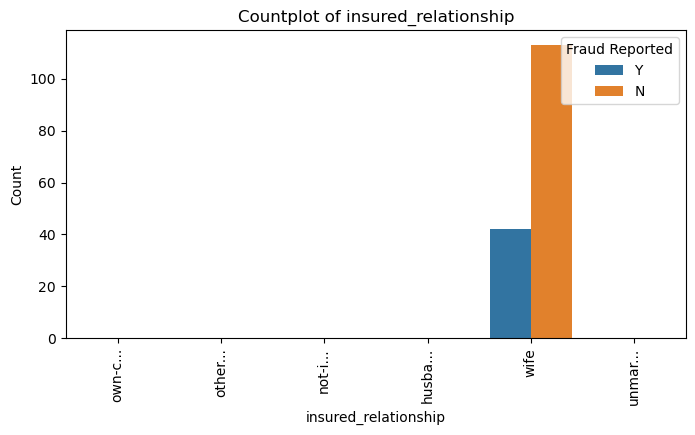

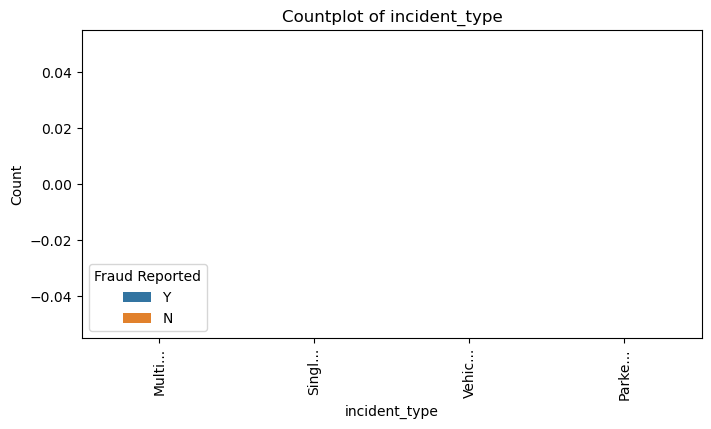

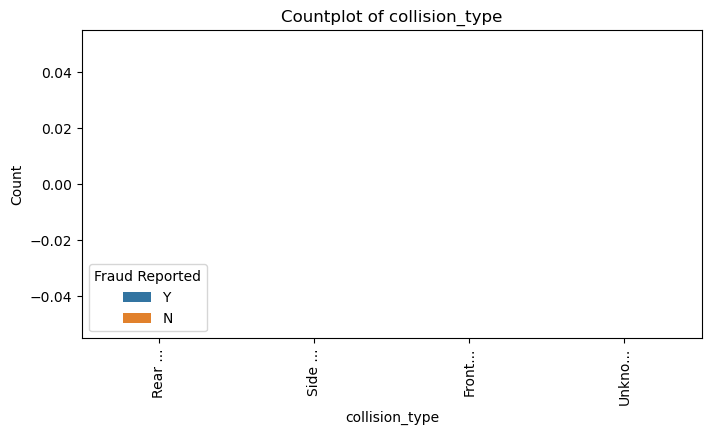

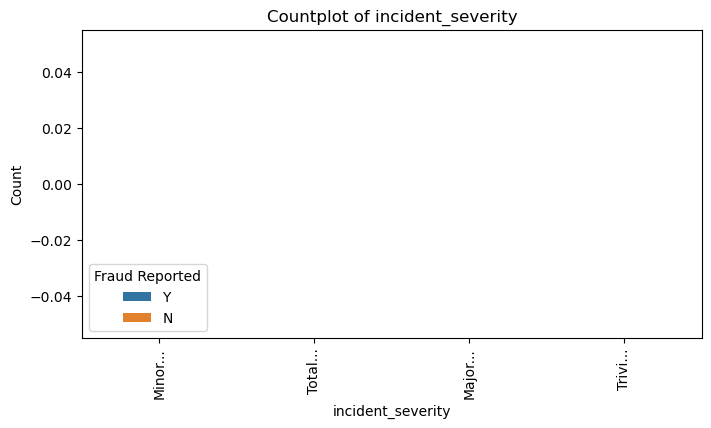

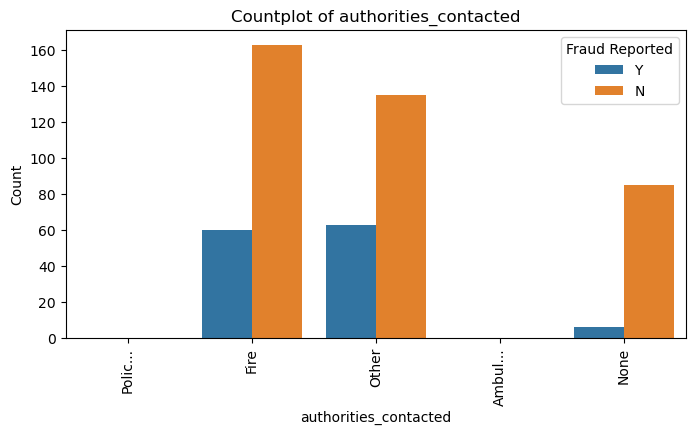

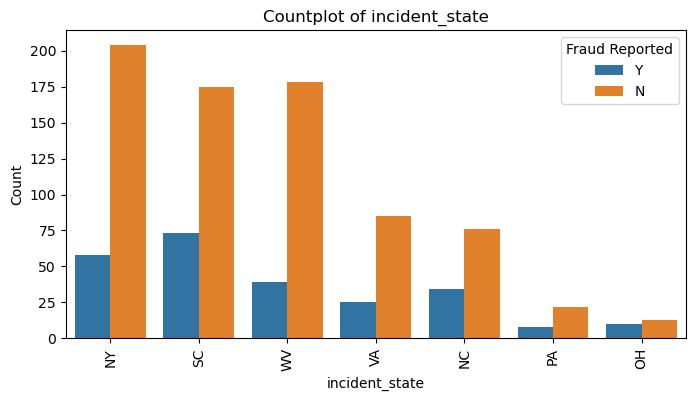

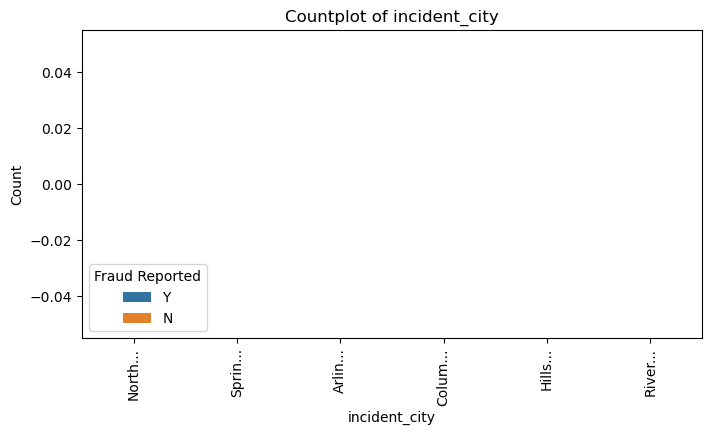

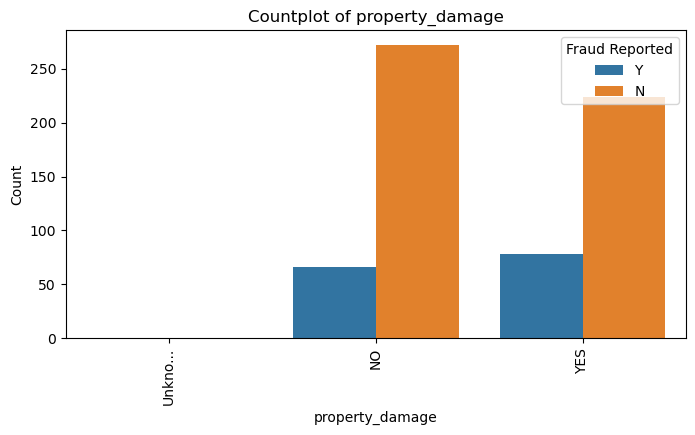

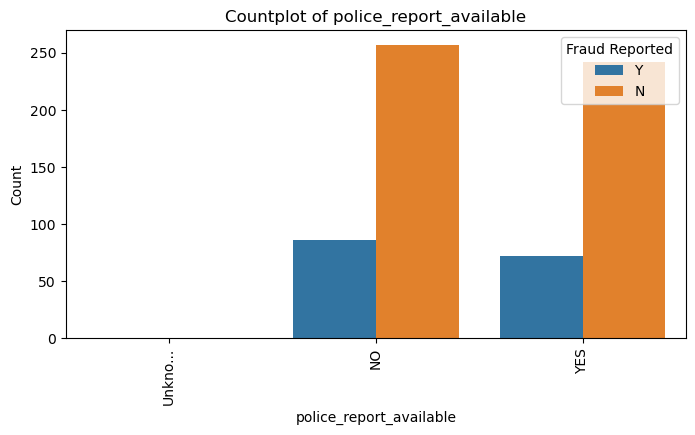

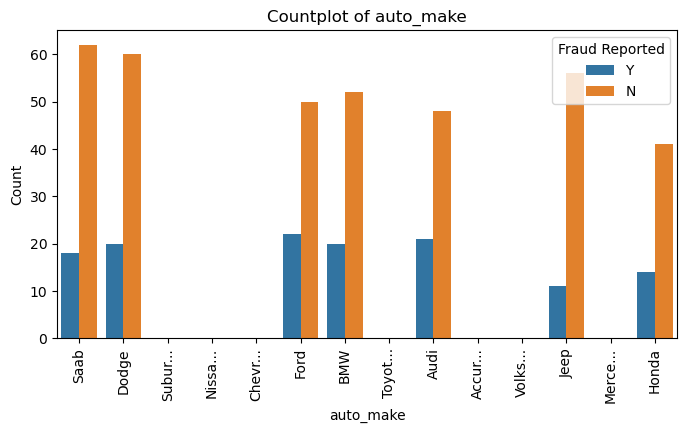

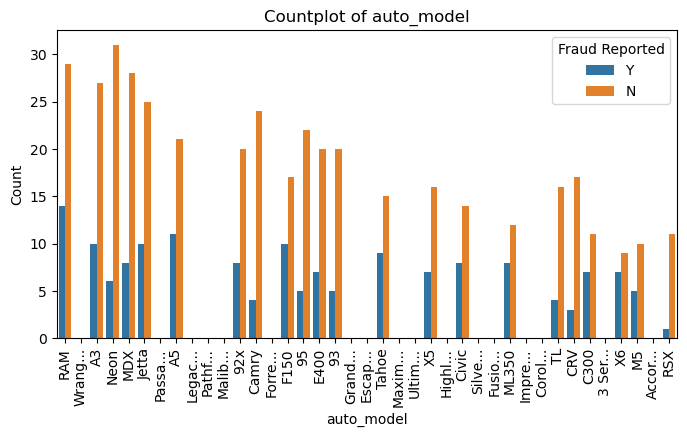

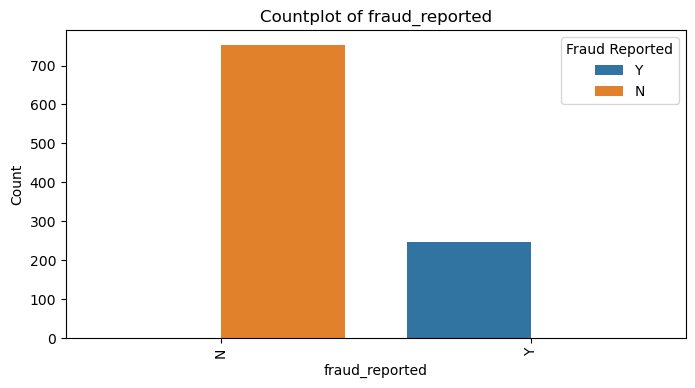

In [24]:
categorical_cols = df.select_dtypes(include=['object']).columns

# Plot countplots for categorical columns with truncated labels
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    truncated_labels = [label[:5] + '...' if len(label) > 5 else label for label in df[col].astype(str)]
    sns.countplot(data=df, x=col, hue='fraud_reported', order=pd.Series(truncated_labels).value_counts().index)
    plt.title(f'Countplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Fraud Reported')
    plt.show()

2.Using Multivariate Plots

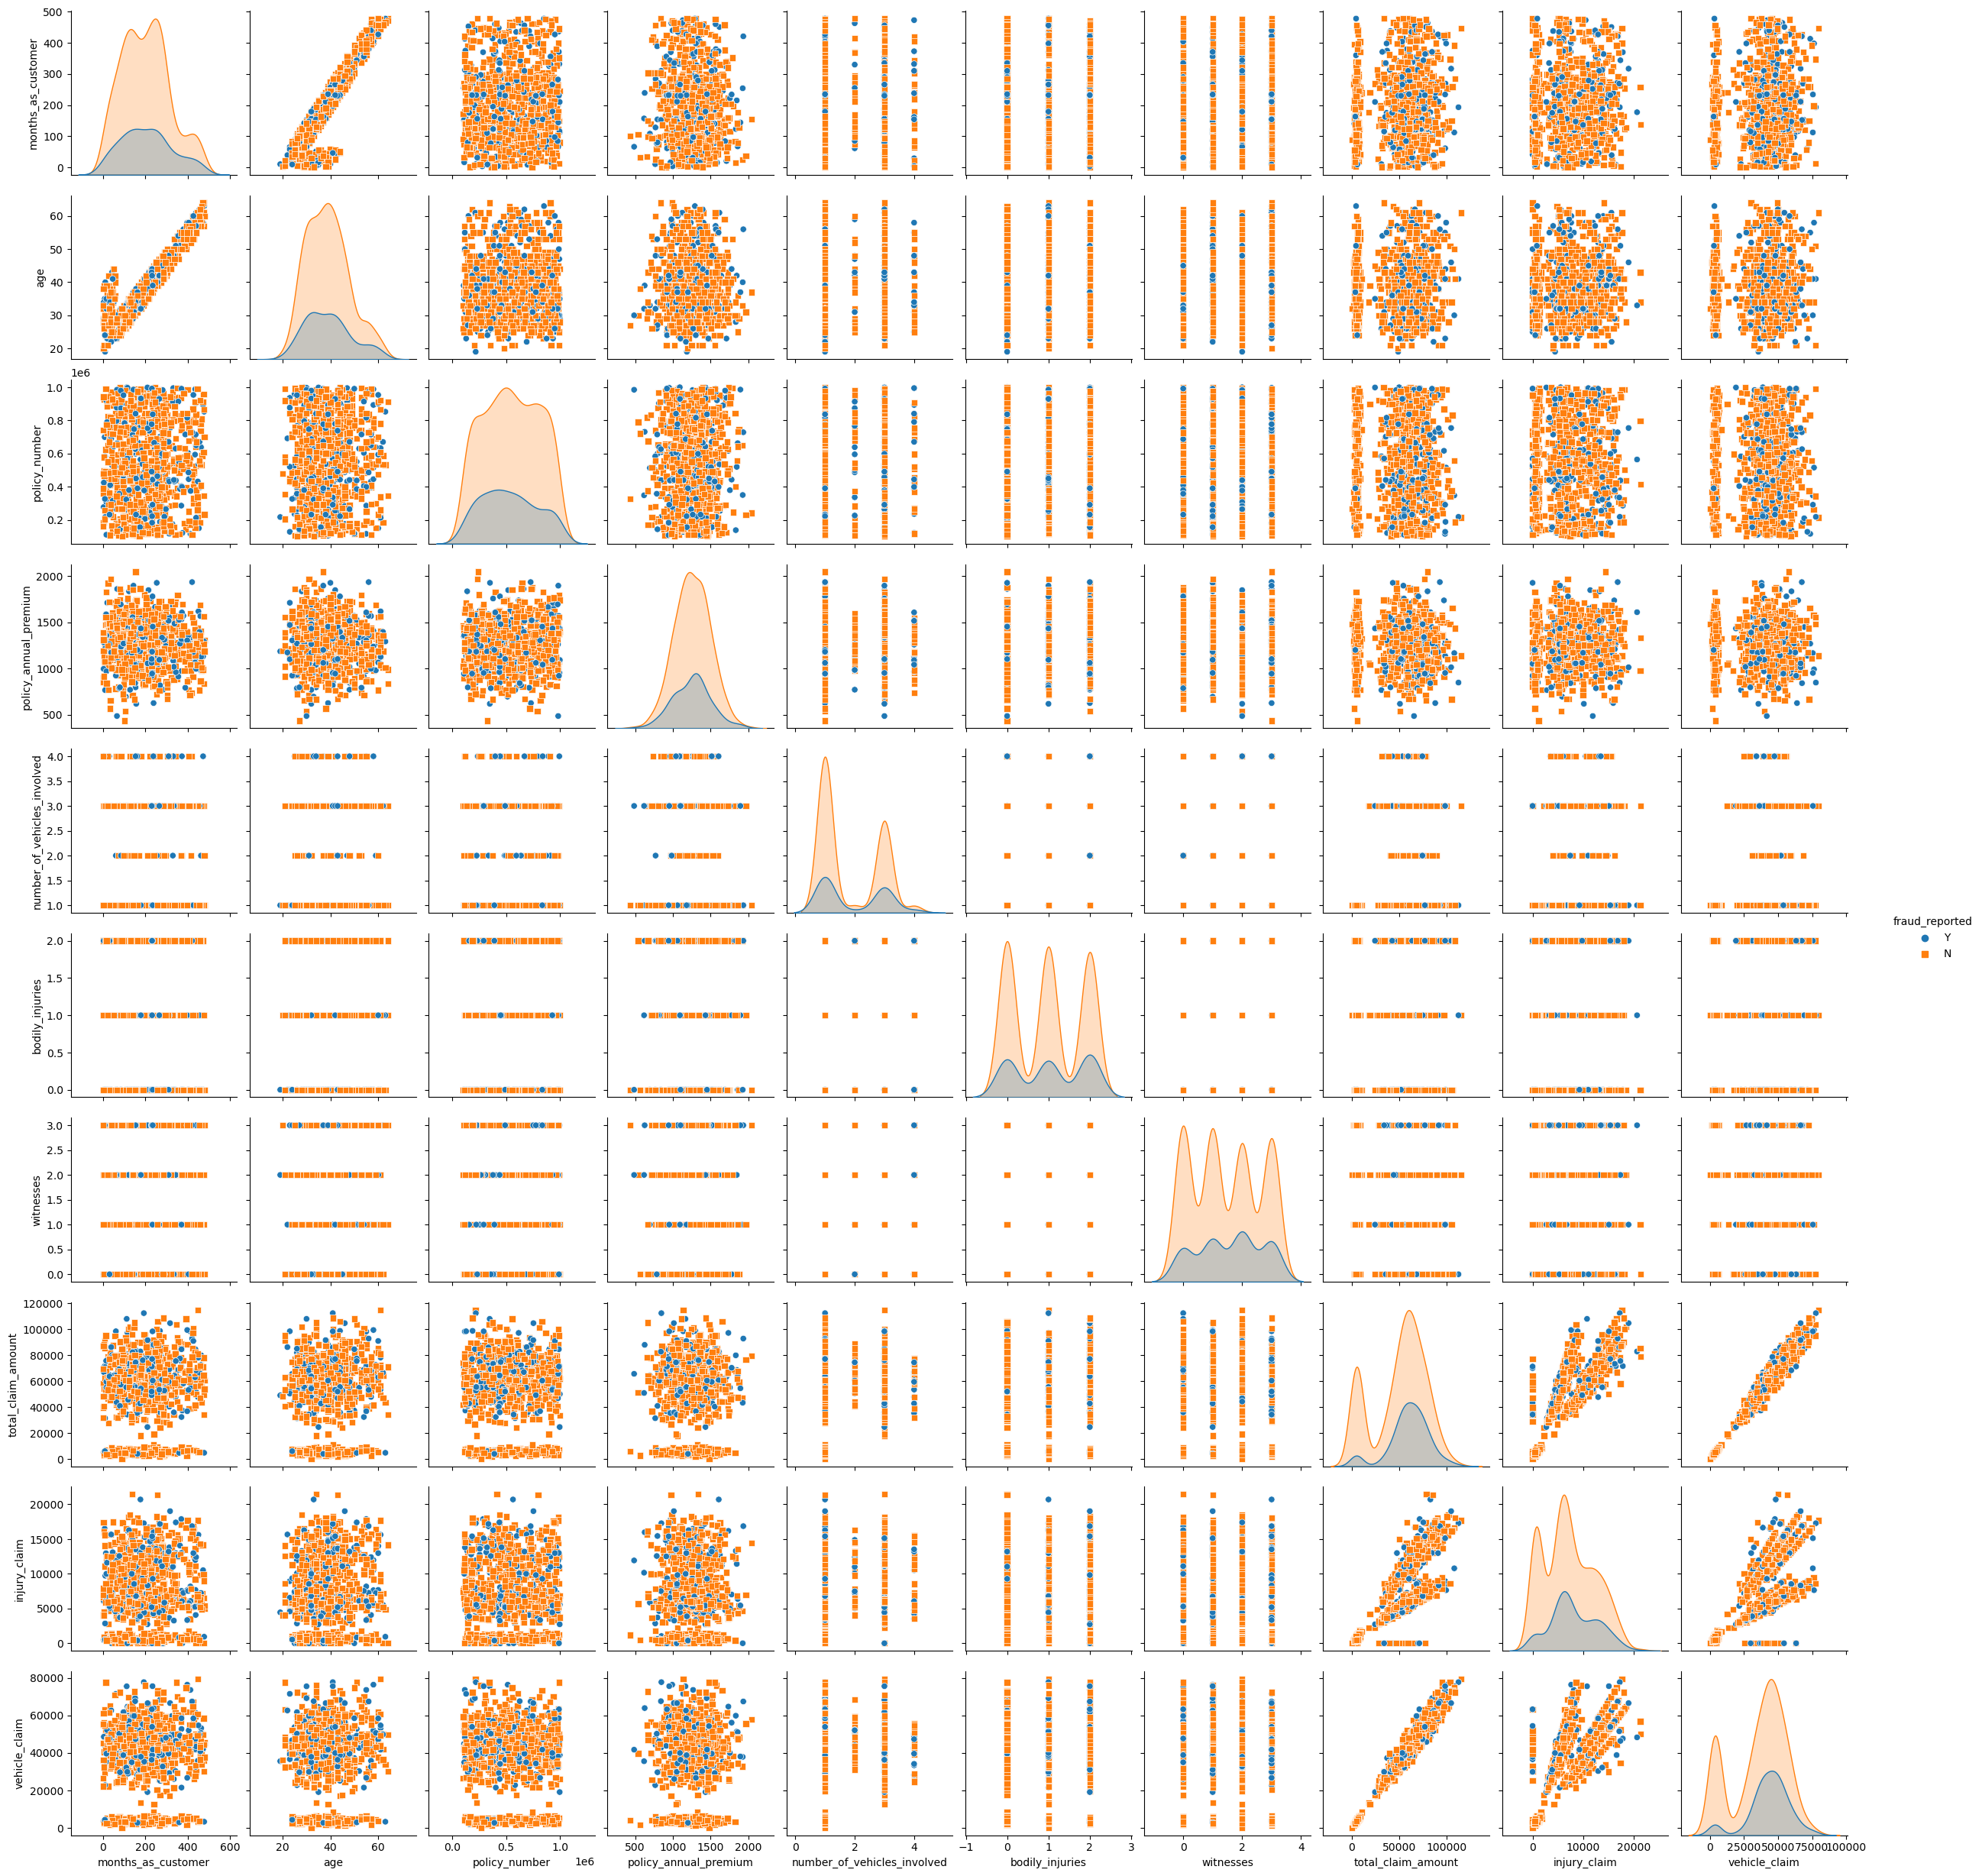

In [25]:
# Select the numerical columns you want to include in the pair plot
numerical_cols = ['months_as_customer', 'age', 'policy_number','policy_annual_premium','number_of_vehicles_involved', 'bodily_injuries', 'witnesses','total_claim_amount', 'injury_claim','vehicle_claim']

# Create a pair plot
sns.pairplot(data=df, vars=numerical_cols, hue='fraud_reported', markers=['o', 's'], diag_kind='kde')
plt.show()


Many of columns show the linear relationship and other are clustered their respective classes.

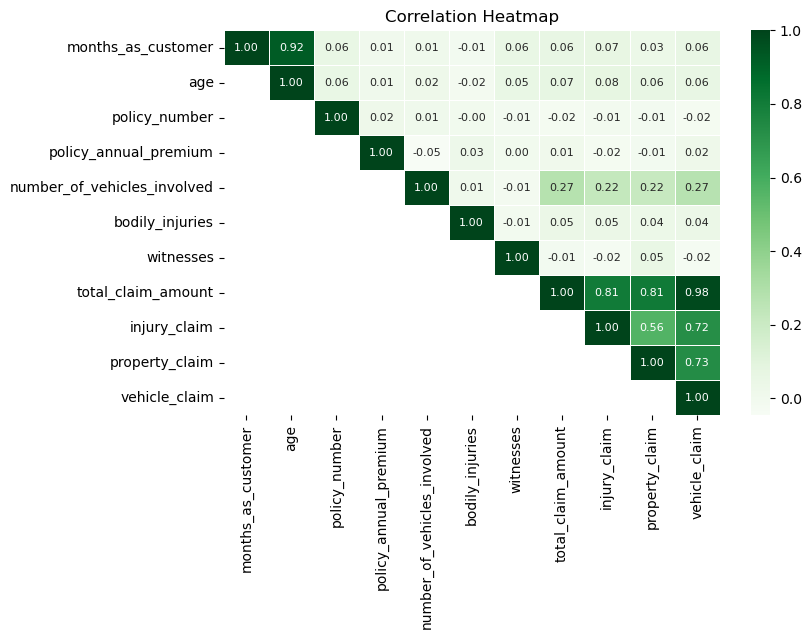

In [26]:
numerical_cols= ['months_as_customer', 'age', 'policy_number','policy_annual_premium','number_of_vehicles_involved', 
                 'bodily_injuries', 'witnesses','total_claim_amount', 'injury_claim','property_claim','vehicle_claim']
# Select only the specified numerical columns
df1 = df[numerical_cols]

# Heatmap to visualize correlations between features
correlation_matrix = df1.corr()

plt.figure(figsize=(8,5))

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   
plt.title('Correlation Heatmap')
plt.show()


'months_as_customer', 'age' columns have highly correlated. 'total_claim_amount', 'injury_claim','property_claim','vehicle_claim' are also highly correlated. 

Box-Plot 

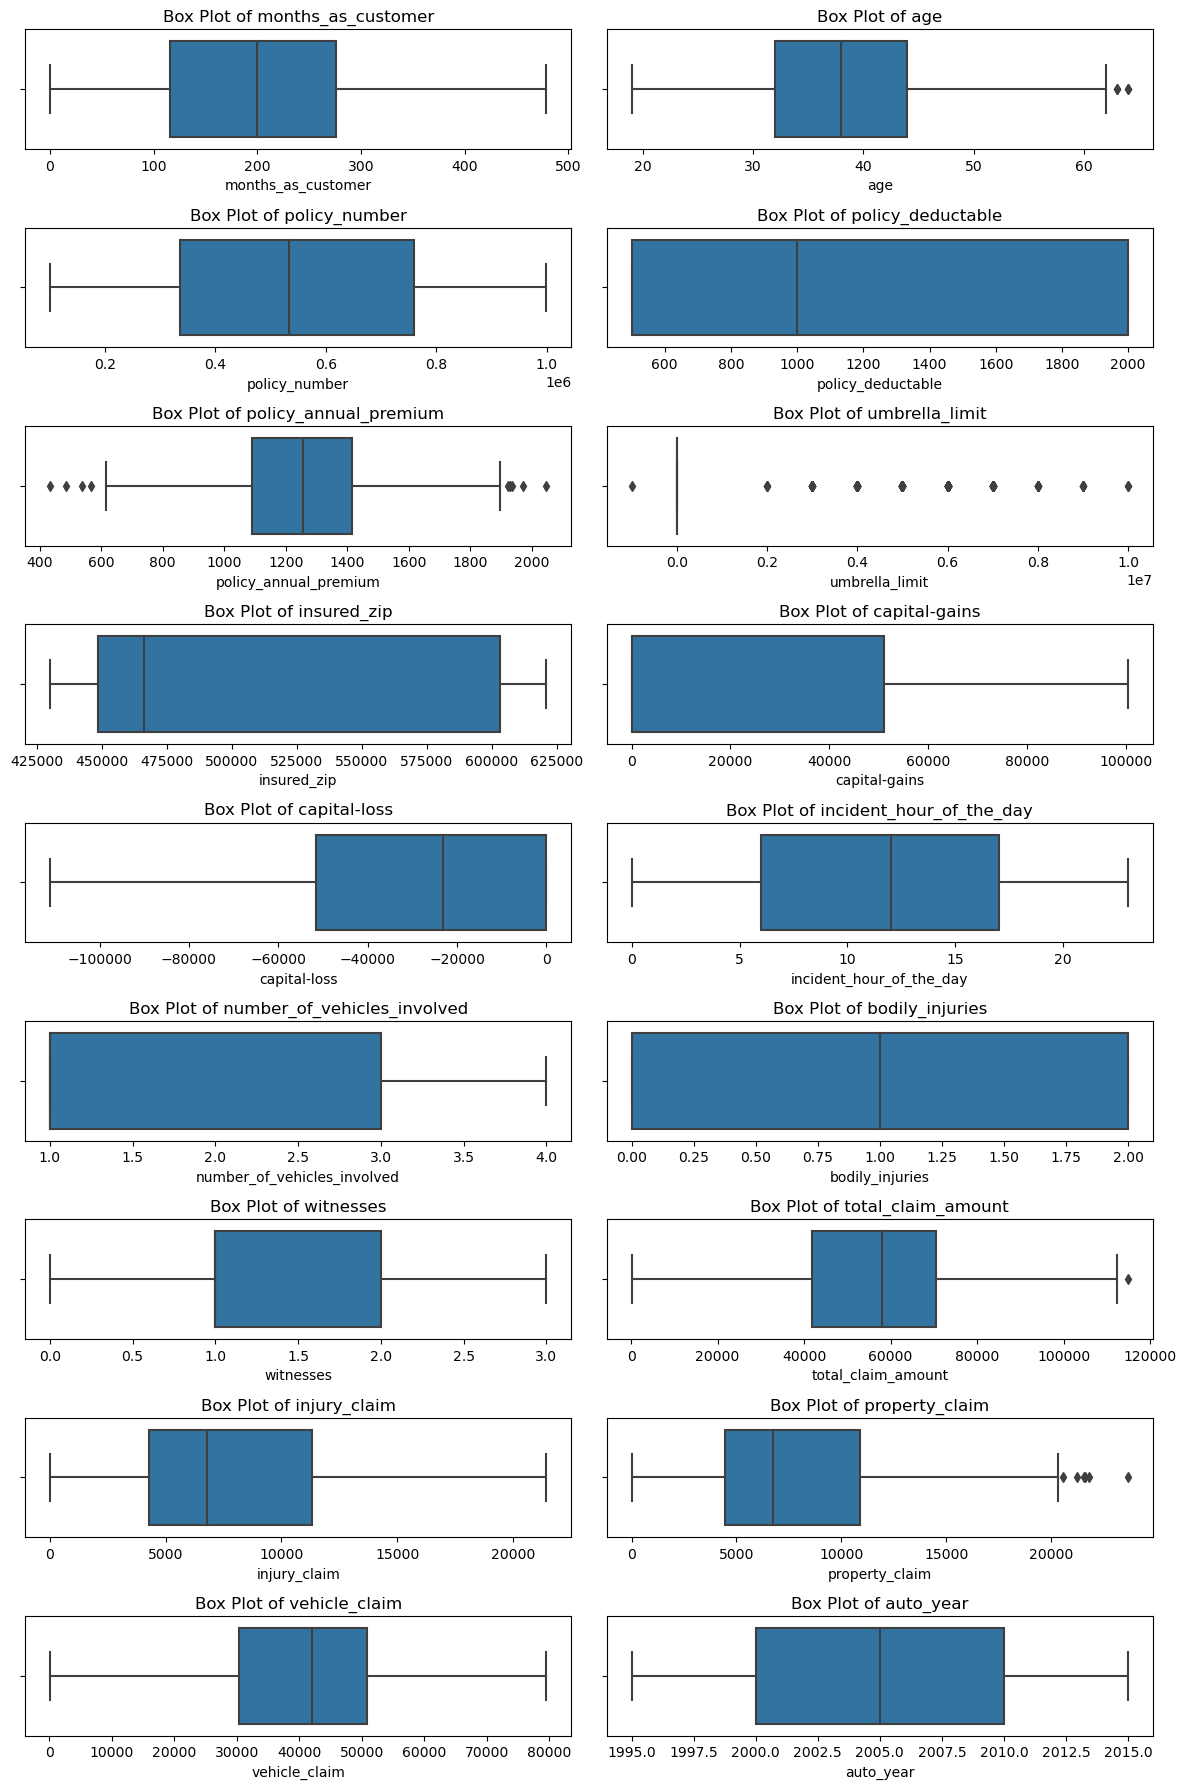

In [27]:
#numerical_columns = ['Age', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = 2  
num_rows = (len(numerical_columns) + 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 18))

# Create box plots for each numerical column in subplots
for i, column in enumerate(numerical_columns):
    row = i // num_cols
    col = i % num_cols
    sns.boxplot(x=column, data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {column}')

# Remove any empty subplots
for i in range(len(numerical_columns), num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    fig.delaxes(axes[row, col])

plt.tight_layout()  
plt.show()


Only few columns have outlier which show the real scenario of insuarance claim. Other are categorical nature of columns .

Skewness removal

In [28]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64


All columns are in range of skewness.Other columns have discrete data.

Checking Variance Inflation Factor (VIF)

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the features for which we want to calculate VIF
selected_features = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)


                        Feature         VIF
0            months_as_customer   28.054078
1                           age  130.169584
2                 policy_number    5.551620
3             policy_deductable    4.549119
4         policy_annual_premium   27.766073
5                umbrella_limit    1.239270
6                   insured_zip   50.373941
7                 capital-gains    1.842112
8                  capital-loss    1.935182
9      incident_hour_of_the_day    4.066136
10  number_of_vehicles_involved    4.676603
11              bodily_injuries    2.492770
12                    witnesses    2.854886
13           total_claim_amount         inf
14                 injury_claim         inf
15               property_claim         inf
16                vehicle_claim         inf
17                    auto_year  135.518476


In [30]:
df = df.drop(['injury_claim', 'property_claim', 'vehicle_claim'], axis=1)

In [31]:
# Select the features for which we want to calculate VIF
selected_features = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)

                        Feature         VIF
0            months_as_customer   27.798287
1                           age  129.035064
2                 policy_number    5.550335
3             policy_deductable    4.509214
4         policy_annual_premium   27.641673
5                umbrella_limit    1.238455
6                   insured_zip   50.285533
7                 capital-gains    1.841111
8                  capital-loss    1.933307
9      incident_hour_of_the_day    4.064059
10  number_of_vehicles_involved    4.676028
11              bodily_injuries    2.491792
12                    witnesses    2.824446
13           total_claim_amount    5.674022
14                    auto_year  134.311608


In [32]:
df = df.drop(['auto_year','age'], axis=1)

In [33]:
# Select the features for which we want to calculate VIF
selected_features = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)

                        Feature        VIF
0            months_as_customer   4.141230
1                 policy_number   5.334199
2             policy_deductable   4.393296
3         policy_annual_premium  20.546475
4                umbrella_limit   1.235962
5                   insured_zip  25.833235
6                 capital-gains   1.829148
7                  capital-loss   1.902691
8      incident_hour_of_the_day   4.014854
9   number_of_vehicles_involved   4.615612
10              bodily_injuries   2.474078
11                    witnesses   2.791699
12           total_claim_amount   5.552763


In [34]:
df = df.drop(['insured_zip','policy_annual_premium'], axis=1)

In [35]:
# Select the features for which we want to calculate VIF
selected_features = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)

                        Feature       VIF
0            months_as_customer  3.848497
1                 policy_number  4.464150
2             policy_deductable  4.000767
3                umbrella_limit  1.222455
4                 capital-gains  1.798799
5                  capital-loss  1.879995
6      incident_hour_of_the_day  3.843617
7   number_of_vehicles_involved  4.399857
8               bodily_injuries  2.333172
9                     witnesses  2.639730
10           total_claim_amount  5.271234


Now all columns have near the range of reqiured VIF value.

In [36]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [37]:
# Split 'policy_csl' into per-person and per-accident limits
df[['per_person_limit', 'per_accident_limit']] = df['policy_csl'].str.split('/', expand=True)

# Convert the new columns to numeric
df['per_person_limit'] = pd.to_numeric(df['per_person_limit'])
df['per_accident_limit'] = pd.to_numeric(df['per_accident_limit'])

# Drop the original 'policy_csl' column
df.drop('policy_csl', axis=1, inplace=True)

In [38]:
# Extract information from 'policy_bind_date'
df['policy_bind_year'] = df['policy_bind_date'].dt.year
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_day'] = df['policy_bind_date'].dt.day

# Extract information from 'incident_date'
df['incident_year'] = df['incident_date'].dt.year
df['incident_month'] = df['incident_date'].dt.month
df['incident_day'] = df['incident_date'].dt.day

# Drop the original datetime columns
df = df.drop(['policy_bind_date', 'incident_date'], axis=1)

In [39]:
# Select the features for which we want to calculate VIF
selected_features = df.select_dtypes(include=['int64', 'float64'])

# Create a DataFrame to store the VIF values
vif_data = pd.DataFrame()
vif_data["Feature"] = selected_features.columns
vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]
print(vif_data)

                        Feature           VIF
0            months_as_customer      1.023061
1                 policy_number      1.017725
2             policy_deductable      1.020330
3                umbrella_limit      1.015853
4                 capital-gains      1.019290
5                  capital-loss      1.011844
6      incident_hour_of_the_day      1.068646
7   number_of_vehicles_involved      1.097645
8               bodily_injuries      1.015304
9                     witnesses      1.021597
10           total_claim_amount      1.145729
11             per_person_limit     95.114821
12           per_accident_limit     94.947384
13             policy_bind_year      1.024297
14            policy_bind_month      1.016447
15              policy_bind_day      1.013466
16                incident_year  75889.205420
17               incident_month      1.825357
18                 incident_day      1.814192


In [40]:
df = df.drop(['incident_year','per_accident_limit','policy_bind_year'], axis=1)

Encoding

In [41]:
import category_encoders as ce

# List of columns to binary encode
multi_categorical_cols = ['policy_state', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship',
                        'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state',
                        'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model']

# Initialize the BinaryEncoder
binary_encoder = ce.BinaryEncoder(cols=multi_categorical_cols)

# Fit and transform the encoder on the dataset
df = binary_encoder.fit_transform(df)

In [42]:
# Perform one-hot encoding for 'insured_sex'
df = pd.get_dummies(df, columns=['insured_sex'], prefix='insured_sex', drop_first=True)

Normalization of data

In [43]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target (y)
x = df.drop(columns='fraud_reported')
Y = df["fraud_reported"]

In [44]:
# Normalize the feature columns using StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

5.Model Development

5.1 Testing Candidate models

In [45]:
#Importing Machine learning Model library
from sklearn.svm  import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_curve

Splitting Data into train test

In [46]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.30, random_state=39)

Classification Algorithms

Logistics Regression

In [47]:
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('Logistics Regression')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))

Logistics Regression
Accuracy Score : 0.8066666666666666
Confusion matrix : [[205  22]
 [ 36  37]]


Decision Tree Classifier

In [48]:
DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)
y_pred=DTC.predict(X_test)
print('Decision Tree Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Decision Tree Classifier
Accuracy Score : 0.75


Random Forest Classifier

In [49]:
RFC=RandomForestClassifier()
RFC.fit(X_train,Y_train)
y_pred=RFC.predict(X_test)
print('Random Forest Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accu = accuracy_score(Y_test, y_pred)

Random Forest Classifier
Accuracy Score : 0.7866666666666666


AdaBoost Classifier

In [50]:
Abc=AdaBoostClassifier()
Abc.fit(X_train,Y_train)
y_pred=Abc.predict(X_test)
print('AdaBoost Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

AdaBoost Classifier
Accuracy Score : 0.7866666666666666


Support Vector Machine Classifier

In [51]:
svc= SVC()
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_test)
print('Support Vector Machine Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))

Support Vector Machine Classifier
Accuracy Score : 0.7866666666666666


Bagging Classifier

In [52]:
BC= BaggingClassifier()
BC.fit(X_train,Y_train)
y_pred = BC.predict(X_test)
print('Bagging Classifier')
print('Accuracy Score :', accuracy_score(Y_test, y_pred))
Accub = accuracy_score(Y_test, y_pred)

Bagging Classifier
Accuracy Score : 0.8033333333333333


Bagging Classifier gives highest Accuracy Score : 0.8166 .

Cross Validation Score

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
# cross validation score for Logistics Regression
# By default CV=5 and Scoring parameter is accuracy 

score= cross_val_score(log_reg,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.81  0.75  0.75  0.785 0.84 ]
0.787
Difference between accuracy score and cross validation score is - -0.00033333333333340764


In [55]:
# cross validation score for random forest classifier
score= cross_val_score(RFC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -', Accu-score.mean() )

[0.765 0.72  0.765 0.79  0.78 ]
0.764
Difference between accuracy score and cross validation score is - 0.022666666666666613


In [56]:
# cross validation score for Bagging Classifier
score= cross_val_score(BC,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.805 0.78  0.76  0.785 0.79 ]
0.784
Difference between accuracy score and cross validation score is - 0.019333333333333313


In [57]:
# cross validation score for AdaBoost Classifier
score= cross_val_score(Abc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.77  0.725 0.74  0.785 0.795]
0.7630000000000001
Difference between accuracy score and cross validation score is - 0.04033333333333322


In [58]:
# cross validation score for Support Vector Machine Classifier
score= cross_val_score(svc,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.795 0.76  0.76  0.8   0.775]
0.778
Difference between accuracy score and cross validation score is - 0.02533333333333332


Our best model is Bagging Classifier which highest avg accuracy score. It's also have minimum Difference between accuracy score and cross validation score.

5.2 Hyperparameter tuning and Performance of model

In [66]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the base Decision Tree classifier with controlled complexity
base_classifier = DecisionTreeClassifier(max_depth=5, min_samples_split=10)  # Adjust max_depth and min_samples_split

# Create a Bagging Classifier with the base Decision Tree
bagging_classifier = BaggingClassifier(base_classifier)  # No specific hyperparameters for Bagging Classifier yet

# Define hyperparameters to tune for both the base Decision Tree and Bagging Classifier
param_grid = {
    'base_estimator__max_depth': [3, 5, 7],  # Decision Tree hyperparameters
    'base_estimator__min_samples_split': [10, 20, 30],
    'n_estimators': [10, 50, 100],  # Bagging Classifier hyperparameters
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
}


In [67]:
# Initialize GridSearchCV
grid_search = GridSearchCV(bagging_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to find the best hyperparameters
grid_search.fit(X_train, Y_train)


GridSearchCV(cv=5,
             estimator=BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5,
                                                                          min_samples_split=10)),
             n_jobs=-1,
             param_grid={'base_estimator__max_depth': [3, 5, 7],
                         'base_estimator__min_samples_split': [10, 20, 30],
                         'max_features': [0.5, 0.7, 1.0],
                         'max_samples': [0.5, 0.7, 1.0],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [68]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy on Test Set:", accuracy)


Best Hyperparameters: {'base_estimator__max_depth': 3, 'base_estimator__min_samples_split': 20, 'max_features': 1.0, 'max_samples': 0.7, 'n_estimators': 50}
Accuracy on Test Set: 0.775


In [69]:
# cross validation score for Bagging Classifier
score= cross_val_score(best_model,X,Y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is -',Accub-score.mean() )

[0.825 0.8   0.76  0.835 0.82 ]
0.808
Difference between accuracy score and cross validation score is - -0.004666666666666708


Final Model

In [70]:
best_hyperparameters = grid_search.best_params_

In [75]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=39)

# Define the base Decision Tree classifier with the best hyperparameters
best_base_classifier_params = {
    'max_depth': 3, 
    'min_samples_split': 20,  
}

# Create the base Decision Tree classifier with the best hyperparameters
base_classifier = DecisionTreeClassifier(**best_base_classifier_params)

# Define the best hyperparameters for the Bagging Classifier
best_bagging_params = {
    'n_estimators': 50,
    'max_samples': 0.7,
    'max_features': 1.0,
    'random_state': 42,
}

# Create the Bagging Classifier with the best hyperparameters
Final_model = BaggingClassifier(base_classifier, **best_bagging_params)

# Fit the Bagging Classifier to the training data
Final_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = Final_model.predict(X_test)

# Evaluate the final model
print('Final Model Bagging Classifier')
print('Accuracy Score:', accuracy_score(Y_test, y_pred))
print('Confusion matrix :',confusion_matrix(Y_test, y_pred))
print('classification Report :',classification_report(Y_test, y_pred))

Final Model Bagging Classifier
Accuracy Score: 0.81
Confusion matrix : [[131  18]
 [ 20  31]]
classification Report :               precision    recall  f1-score   support

           N       0.87      0.88      0.87       149
           Y       0.63      0.61      0.62        51

    accuracy                           0.81       200
   macro avg       0.75      0.74      0.75       200
weighted avg       0.81      0.81      0.81       200



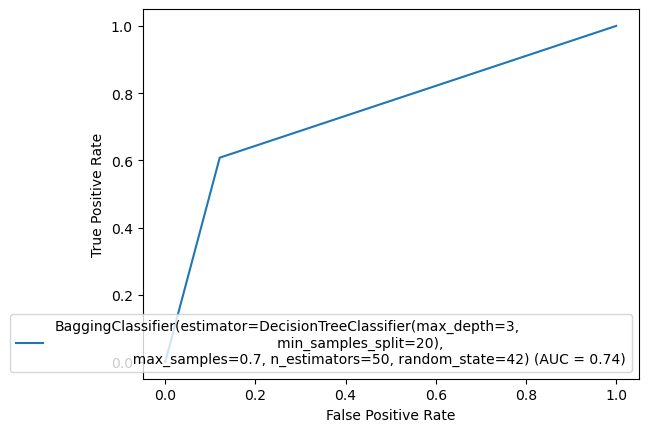

In [79]:
from sklearn import metrics

# Assuming 'Yes' represents the positive class and 'No' represents the negative class
# we can use a simple mapping to convert them to binary labels
Y_test_binary = Y_test.map({'N': 0, 'Y': 1})
y_pred_binary = np.where(y_pred == 'Y', 1, 0)

fpr, tpr, thresholds = metrics.roc_curve(Y_test_binary, y_pred_binary)
roc_auc = metrics.auc(fpr, tpr)

display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=Final_model)
display.plot()


From AUC-ROC has AUC value = .74 which seem good in model prediction.

5.3 Saving model

In [76]:
import joblib 
joblib.dump(Final_model,'Insurance Claim Fraud Detection Project.pkl')

['Insurance Claim Fraud Detection Project.pkl']

5.4 Predicting the Final Model

In [77]:
prediction = Final_model.predict(X_test)

In [78]:
Actual = np.array(Y_test)
df_pred = pd.DataFrame()
df_pred["Predicted fraud_reported"] = prediction
df_pred["Actual fraud_reported"] = Actual
df_pred.head(10)

,Predicted fraud_reported,Actual fraud_reported
0,Y,N
1,N,N
2,Y,Y
3,N,N
4,N,N
5,N,N
6,Y,Y
7,N,N
8,N,N
9,N,N


In [ ]:
Our model can predicte the Fraud Claim of insurance. Its accuracy is also good.